In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from matplotlib import pyplot as plt

from common import mockservation as ms

## Create Image with Single Fourier Mode

In order to test the implmentation of FFT and iFFT, we use anisotropic FoV and anisotropic resolution.

Peak "brightness" is 1.

(32, 64) 12.566370614359172 6.283185307179586
1.0 -1.0


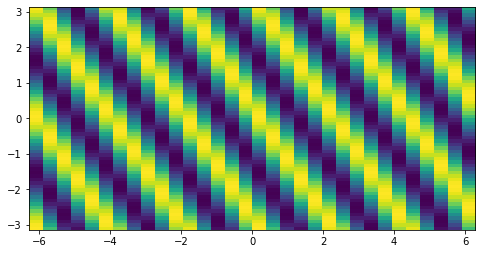

In [2]:
width  = 4 * np.pi
height = 2 * np.pi

x = np.linspace(-width /2, width /2, num=32, endpoint=False)
y = np.linspace(-height/2, height/2, num=64, endpoint=False)

X, Y = np.meshgrid(x, y, indexing='ij')
F = np.cos(3*X + 2*Y)
#F = np.cos(3*X) * np.cos(2*Y)
#F = np.exp(-0.5*(X*X + Y*Y))

plt.figure(figsize=(8, 8))
plt.imshow(F.T, origin='lower', interpolation=None, extent=[-width/2, width/2, -height/2, height/2])

print(F.shape, width, height)
print(np.max(F), np.min(F))

## Perform FFT without Any Padding

We manually force the original image resolution when applying FFT.

The resulting FFT should have only one bright pixels, corresponding to the Fourier mode that we constructed.

(32, 33) 2.5464790894703255 10.185916357881302
1024.0 8.575866012098123e-16


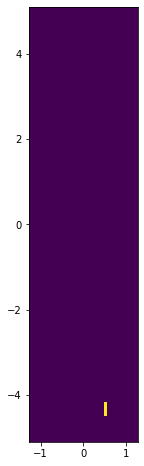

In [3]:
S, U, V = ms.upfft(F, width, height, N=[32,64])

plt.figure(figsize=(8, 8))
plt.imshow(abs(S.T), origin='lower', interpolation=None, extent=[-U/2, U/2, -V/2, V/2])

print(S.shape, U, V)
print(np.max(abs(S)), np.min(abs(S)))

## Perform iFFT without Any Truncation

We then inverse transform the visibility back to the image with the original resolution.

The resulting image should be identical the original image down to machine accuracy.

True True True
(-1.4988010832439613e-15+0j)
(1.371125435412068e-14+0j)
(32, 64) 12.566370614359172 6.283185307179586
1.0000000000000004 -1.0000000000000004


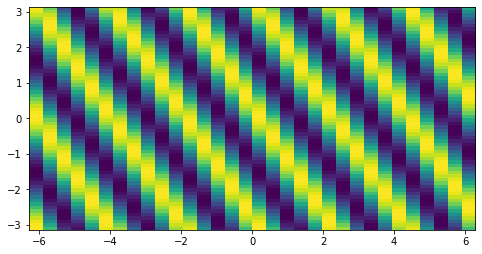

In [4]:
F2, W2, H2 = ms.downifft(S, U, V, N=[32,64])

plt.figure(figsize=(8, 8))
plt.imshow(F2.T, origin='lower', interpolation=None, extent=[-W2/2, W2/2, -H2/2, H2/2])

print(F2.shape, W2, H2)
print(np.max(F2), np.min(F2))

## Perform iFFT with Trancation

Try to built-in choices, which make the image domain resolution more isotropic.

True True True
(-1.4988010832439613e-15+0j)
(1.371125435412068e-14+0j)
(32, 64) -> [32 16]
(32, 16) 12.566370614359172 6.283185307179586
1.0000000000000004 -1.0000000000000004


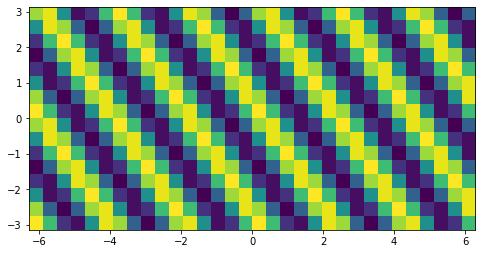

In [5]:
F2, W2, H2 = ms.downifft(S, U, V)

plt.figure(figsize=(8, 8))
plt.imshow(F2.T, origin='lower', interpolation=None, extent=[-W2/2, W2/2, -H2/2, H2/2])

print(F2.shape, W2, H2)
print(np.max(F2), np.min(F2))

## Perform iFFT with Trancation

Try the minimal resolution that can capture the wave.

True True True
(-1.4988010832439613e-15+0j)
(1.371125435412068e-14+0j)
(12, 4) 12.566370614359172 6.283185307179586
1.0000000000000013 -1.0000000000000013


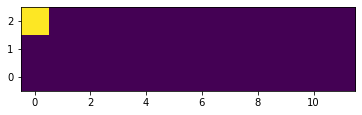

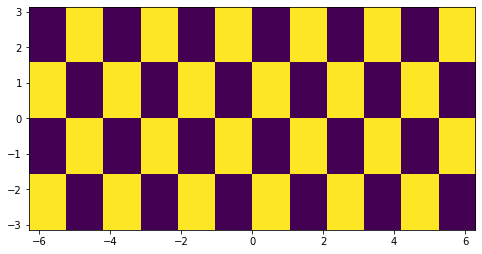

In [6]:
F2, W2, H2 = ms.downifft(S, U, V, N=[12,4], show=True)

plt.figure(figsize=(8, 8))
plt.imshow(F2.T, origin='lower', interpolation=None, extent=[-W2/2, W2/2, -H2/2, H2/2])

print(F2.shape, W2, H2)
print(np.max(F2), np.min(F2))

## Perform Forward Transform with Padding

Try default choice to make spectral domain resolution more isotropic.

(32, 64) -> [ 32 128]
(32, 65) 2.5464790894703255 10.185916357881302
1024.0 2.0251375964178618e-16


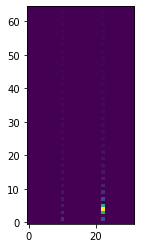

In [7]:
S, U, V = ms.upfft(F, width, height)

plt.imshow(abs(S.T), origin='lower', interpolation=None)

print(S.shape, U, V)
print(np.max(abs(S)), np.min(abs(S)))

True True True
(-1.4988010832439613e-15+0j)
(1.371125435412068e-14+0j)
(32, 128) -> [32 32]
(32, 32) 12.566370614359172 12.566370614359172
1.0557275702438125 -1.0557275702438125


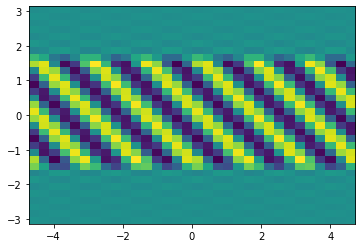

In [8]:
F2, W2, H2 = ms.downifft(S, U, V)

plt.imshow(F2.T, origin='lower', interpolation=None, extent=[-1.5*np.pi, 1.5*np.pi, -np.pi, np.pi])

print(F2.shape, W2, H2)
print(np.max(F2), np.min(F2))

## Perform Forward Transform with Padding

Increase the image domain FoV to increase the visibility domain resolution.

(256, 129) 2.5464790894703255 10.185916357881302
1024.0 0.0


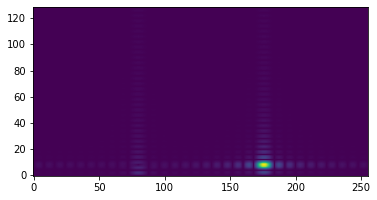

In [9]:
S, U, V = ms.upfft(F, width, height, N=[256,256])

plt.imshow(abs(S.T), origin='lower', interpolation=None)

print(S.shape, U, V)
print(np.max(abs(S)), np.min(abs(S)))

True True True
(-1.4988010832439613e-15+0j)
(1.371125435412068e-14+0j)
(250, 250) 100.53096491487338 25.132741228718345
1.1224883436312907 -1.1849047669516097


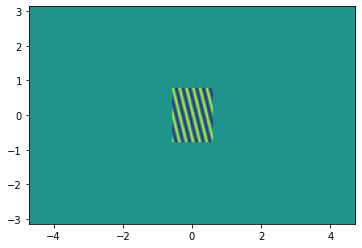

In [10]:
F2, W2, H2 = ms.downifft(S, U, V, N=[250,250])

plt.imshow(F2.T, origin='lower', interpolation=None, extent=[-1.5*np.pi, 1.5*np.pi, -np.pi, np.pi])

print(F2.shape, W2, H2)
print(np.max(F2), np.min(F2))